<a href="https://colab.research.google.com/github/YeongRoYun/BearTeam/blob/dev/data/eda/EDA01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI-HUB Dataset EDA
> ` https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=629`


In [ ]:
import os
from pathlib import Path
basePath = Path(os.getcwd()).parent / 'datasets'
dataPath = basePath / 'aihub_raw'

assert os.path.exists(dataPath)

## 파일구조 확인하기
- Raw Image와 동일한 폴더 구조에 각 Image의 Annotation JSON File이 위치한다.
- File Structure

```
datasets
   |
   | --- Training/Validation
           |
           | ---- Annotations(라벨링데이터)/Raws(원천데이터)
                      |
                      |
                      | --- Day(주간)/Night(야간)
                                |
                                | ---- Clear(맑음)/Rain(비)/Snow(눈)
                                                |
                                                | ---- OldTown(구도심)
                                                | ---- NewTown(신도심)
                                                | ---- Alley(골목)
                                                | ---- Country(시골길)
                                                | ---- Mountain(산길)
                                                | ---- Coastal(해안도로)
                                                | ---- Highway(고속도로)
                                                | ---- Motorway(자동차전용)
                                                    |
                                                    | dates(yyyymmdd_serial)
                                                        |-- Camera
                                                          |
                                                          | -- front
                                                          | -- left
                                                          | -- rear
                                                          | -- right
                                                          | -- stereo_l
                                                          | -- stereo_r
                                                             |
                                                             | -- id.json/id.jpg
```
- 데이터셋은 위의 파일 구조 형태를 공유한다.

## 파일구조 통일시키기
- 한글과 영어가 혼용된 파일명을 영어로 일관되게 통일시킨다.
- 예시: `주간 -> Day, 맑음 -> Sun`

> Annotation data로 Formating을 검증한다.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os
import re

In [ ]:
# Training / Validation relative Path
trainingPath = 'Training'
validationPath = 'Validation'

assert os.path.exists(dataPath / trainingPath)
assert os.path.exists(dataPath / validationPath)

# Annotations/Raws relative Path
rawPath = Path('Raws')
annotationPath = Path('Annotations')

assert os.path.exists(dataPath / trainingPath / annotationPath)
assert os.path.exists(dataPath / validationPath / annotationPath)

# Day/ Night relative path
dayPath = Path('Day')
nightPath = Path('Night')

assert os.path.exists(dataPath / trainingPath / annotationPath / dayPath)
assert os.path.exists(dataPath / trainingPath / annotationPath / nightPath)

# Sun/Rain/Snow relative Path(없을 수도 있다.)
clearPath = Path('Clear')
rainPath = Path('Rain')
snowPath = Path('Snow')

assert os.path.exists(dataPath / trainingPath / annotationPath / dayPath / clearPath)
assert os.path.exists(dataPath / trainingPath / annotationPath / dayPath / rainPath)

# Road relative Path(없을 수도 있다.)
oldTownPath = Path('OldTown')
newTownPath = Path('NewTown')
alleyPath = Path('Alley')
countryPath = Path('Country')
mountainPath = Path('Mountain')
coastalPath = Path('Coastal')
highwayPath = Path('Highway')
motorwayPath = Path('Motorway')

assert os.path.exists(dataPath / trainingPath / annotationPath / dayPath / clearPath / oldTownPath)
assert os.path.exists(dataPath / trainingPath / annotationPath / dayPath / clearPath / newTownPath)
assert os.path.exists(dataPath / trainingPath / annotationPath / dayPath / clearPath / motorwayPath)

# Date relative Path(20220101_001)
datePathRegex = r'(\d{8}_\d{3})'

testPath = dataPath / trainingPath / annotationPath / dayPath / clearPath / oldTownPath

datePaths = [d.name for d in testPath.iterdir()]
print(f"date: {datePaths[0]}")

# Camera relative Path
cameraPath = Path('Camera')

assert os.path.exists(dataPath / trainingPath / annotationPath / dayPath / clearPath / oldTownPath / datePaths[0] / cameraPath)

# Camera Position relative Path(없을 수 있다!)
frontPath = Path('front')
rearPath = Path('rear')
leftPath = Path('left')
rightPath = Path('right')
stereo_lPath = Path('stereo_l')
stereo_rPath = Path('stereo_r')

assert os.path.exists(dataPath / trainingPath / annotationPath / dayPath / clearPath / oldTownPath / '20210906_018' / cameraPath / frontPath)

# Id relative path
idPathRegex = r'(.+).json'

testPath = dataPath / trainingPath / annotationPath / dayPath / clearPath / oldTownPath / '20210906_018' / cameraPath / frontPath
idPaths = [i.name for i in testPath.iterdir()]
print(f"id: {idPaths[0]}")
print(f"extract id: {re.search(idPathRegex, '1_1_1_20210906_018_00000251.json')[1]}")


date: 20211130_038
id: 1_1_1_20210906_018_00000081.json
extract id: 1_1_1_20210906_018_00000251


## JSON 형식 확인
```
{
    "Images.identifier"    : Raws 이미지와 Annotations Json을 연결하는 id
    "Images.type"          : Image의 확장자,
    "Images.width"         : Image의 가로 길이
    "Images.height"        : Image의 세로 길이
    "Images.data_captured" : 이미지가 촬영된 시간(yyyy-mm-dd hh:mm:ss)
    "Images.weather"       : 이미지가 촬영된 날씨(clear/rain/snow)
    "Images.road_type"     : 이미지가 촬영된 도로
                           : urban_old(구도심), urban_new(신도심), residential(주거지역), rural(시골길)
                           : mountainous(산길), coastal(해안도로), highway(고속도로), car_only(자동차 전용도로)
    "Images.frame_num"     : 영상 내 프레임 위치
    "Images.num_object"    : 이미지 내 객체 수
    "Images.num_trackid"   : Sequence에서 추적하고 있는 대상의 수
    "annotations"          : 라벨링 정보(없을 수 있다.)
          {
               "bbox.id"        : 바운딩박스 식별자
               "bbox.category"  : 바운딩박스 물체 분류
                                : "car", "truck", "bus", "other vehicles", "pedestrian"(보행자)
                                : "motorcycle", "bicycle", "dontcare"
                                
               "bbox.x"         : 바운딩박스 시작점(min_x)
               "bbox.y"         : 바운딩박스 시작점(min_y)
               "bbox.width"     : 바운딩박스 가로 길이
               "bbox.height"    : 바운딩박스 세로 길이
               "bbox.size"      : 바운딩 박스 크기 정도(small/medium/large)
               "bbox.occluded"  : 객체가 가려졌는지(0: 온전함, 1: 가려짐(~50%), 2: 가려짐(~70%))
               "bbox.truncated" : 객체가 잘렸는지(0: 온전함, 1: 잘림)
          }
}
```

### 신뢰할 수 없는 정보
- `bbox.size`
  - 비슷한 비율의 박스가 Small/Medium으로 혼동되어 분류된다.
  - 일정한 비율을 정하여 새롭게 라벨링 해야만 한다.
  - 기준(area_ratio)
    - `small   : 0.0 ~ 0.01`
    - `medium  : 0.01 ~ 0.04`
    - `large   : 0.04 ~ 1.0`

In [ ]:
testPath = testPath = dataPath / trainingPath / annotationPath / dayPath / clearPath / oldTownPath / '20210906_018' / cameraPath / frontPath
testJson = [i.name for i in testPath.iterdir()][0]

testJsonPath = testPath / testJson

with open(testJsonPath, 'r') as fd:
    test = json.load(fd)
    print(json.dumps(test, indent=4))
    
    # 파일의 id = Images.identifier = raws iamage의 name이다.
    assert test['Images.identifier'] == re.search(idPathRegex, testJson)[1]
    
    annotations = test['annotations']
    
    # Bounding Box는 num_object만큼 있다.
    assert len(annotations) == test['Images.num_object']
    
    print("\n\n======================\n")
    
    # bbox size 확인
    # None 값이 포함된다.
    # 신뢰할 수 없는 분류를 가진다.
    for annotation in annotations:
        width_ratio = annotation['bbox.width'] / test['Images.width']
        height_ratio = annotation['bbox.height'] / test['Images.height']
        print(f"size: {annotation['bbox.size']}, area_ratio: {width_ratio * height_ratio:.2f}")
        
    
    print("\n\n======================\n")
    # Re-Labeling
    bboxSizeClassifier = {'small': 0.01, 'medium': 0.04, 'large': 1.0}
    for annotation in annotations:
        width_ratio = annotation['bbox.width'] / test['Images.width']
        height_ratio = annotation['bbox.height'] / test['Images.height']
        area_ratio = width_ratio * height_ratio
        
        if area_ratio <= bboxSizeClassifier['small']:
            annotation['bbox.size'] = 'small'
        elif area_ratio < bboxSizeClassifier['medium']:
            annotation['bbox.size'] = 'medium'
        else:
            annotation['bbox.size'] = 'large'
        
        print(f"size: {annotation['bbox.size']}, area_ratio: {width_ratio * height_ratio:.2f}")   
    

{
    "Images.identifier": "1_1_1_20210906_018_00000081",
    "Images.type": "jpg",
    "Images.width": 1920,
    "Images.height": 1200,
    "Images.data_captured": "2021-09-06 11:45:32",
    "Images.weather": "clear",
    "Images.road_type": "urban_old",
    "Images.frame_num": 81,
    "Images.num_object": 5,
    "Images.num_trackid": 430,
    "annotations": [
        {
            "bbox.id": 1,
            "bbox.category": "car",
            "bbox.x": 901.1708984375,
            "bbox.y": 636.5517578125,
            "bbox.width": 138.02910156250073,
            "bbox.height": 111.14824218750073,
            "bbox.size": "medium",
            "bbox.truncated": 0,
            "bbox.occluded": 0
        },
        {
            "bbox.id": 13,
            "bbox.category": "truck",
            "bbox.x": 1053.041015625,
            "bbox.y": 574.69921875,
            "bbox.width": 54.069726562500364,
            "bbox.height": 84.40078125000036,
            "bbox.size": "medium",
         

## Annotation 이용 방법

### 보다 정밀한 Loss 계산
- `truncated`와 `occluded` 정보를 활용해 가중치를 줌으로써 더 정확하게 계산할 수 있도록 만든다.
- `wheather` 정보를 활용해 가중치를 줌으로써 더 정확하게 계산할 수 있도록 만든다.

### 사용할 Object Class
- 자전거 전용 도로에서 자전거/오토바이/사람의 후방에서의 추월을 탐지하는 것이 본 모델의 목적이다.
- 따라서 "motorcycle", "bicycle", "pedestrian" Class를 제외한 나머지는 "dontcare"로 설정하여 하나의 Class로 합친다.

### Data Inbalance
- 위에서 Class를 합치는 경우 데이터 불균형 문제가 커질 것이다.
- 프로젝트 마감이 얼마 남지 않은 관계로 우리는 Downsampling을 사용해 보다 적은 Class에 맞춰 데이터의 비중을 조정할 것이다.

# Dataset 구축하기

In [7]:
# Dataset 만들기
import os
import re
import random
import numpy as np
from pathlib import Path
from functools import reduce
from torch.utils.data import Dataset
from PIL import Image, UnidentifiedImageError

class AIHUBDataset(Dataset):
    """
    Raw Image와 Annotations를 정제한다.
    """
    def __init__(self, root="datasets/", train=True):
        """
        path : 데이터셋이 위치한 경로
        train : train/validation Dataset 만들기!
        """
        super().__init__()
        self._setPaths(root)
        self._train = train
        self._annotationFolders = self._get_annotation_folders()

        self._len = self._get_len() # annotationFolder 이용해서 길이를 구한다!
        
        
    def _setPaths(self, root):
        """
        Path object로 path를 지정한다.
        """
        self._rootPath = Path(root)
        self._trainingPath = 'Training'
        self._validationPath = 'Validation'
        
        # Raw / Annotations
        self._rawPath = Path('Raws')
        self._annotationPath = Path('Annotations')
        
        # 아침/밤
        self._dayPath = Path('Day')
        self._nightPath = Path('Night')
        
        # 날씨
        self._clearPath = Path('Clear')
        self._rainPath = Path('Rain')
        self._snowPath = Path('Snow')
        
        # 도로
        self._oldTownPath = Path('OldTown')
        self._newTownPath = Path('NewTown')
        self._alleyPath = Path('Alley')
        self._countryPath = Path('Country')
        self._mountainPath = Path('Mountain')
        self._coastalPath = Path('Coastal')
        self._highwayPath = Path('Highway')
        self._motorwayPath = Path('Motorway')
        
        # 날짜는 정규식으로 대체한다.
        
        # 카메라
        self._cameraPath = Path('Camera')
        self._frontPath = Path('front')
        self._rearPath = Path('rear')
        self._leftPath = Path('left')
        self._rightPath = Path('right')
        self._stereo_lPath = Path('stereo_l')
        self._stereo_rPath = Path('stereo_r')
    
    def shuffle(self):
        """
        Index-based 로 반환되는 값을 섞을지 확인한다.
        이미지 파일이 매우 크고, DataLoader의 특성 상 Index 하나 하나를 호출하기 때문에 I/O가 빈번하다.
        Data를 불러오는 시간이 매우 커지기 때문에 Annotations를 섞는 것으로 Shuffle을 대체한다.
        DataLoader에서 사용할 때는 Custom화하여 사용한다.!!!
            - Sampler는 shuffle을 호출한다.
            - _collate_fn :  batch_size만큼 slice를 이용해서 I/O Overhead를 줄인다.
                - dadtaloader의 drop_last = True일때를 고려하애 한다!
        """
        random.shuffle(self._annotationFolders)
        return None
        
    def __getitem__(self, idx):
        """
        Return : Raw Image(PIL format, RGB)를 Numpy로!, Annotation
        순서는 위의 Path가 정해진 순서로 반환한다.
        """
        # 각 folder의 길이를 구한다.
        counts = list(map(lambda path: len(os.listdir(path)), self._annotationFolders))
        
        if type(idx) == slice:
            start = 0 if idx.start == None else idx.start
            stop = self._len if idx.stop == None else idx.stop
            step = 1 if idx.step == None else idx.step
            scope = range(start, stop, step)
            
            ret = [self._get_an_item(i, counts)[2:] for i in scope]
            return list(zip(*ret))
        else:
            return self._get_an_item(idx, counts)[2:]

    def get_with_path(self, idx):
        """
        Return : raw Path, anno Path, Raw Image(PIL format, RGB), Annotation
        순서는 위의 Path가 정해진 순서로 반환한다.
        """
        # 각 folder의 길이를 구한다.
        counts = list(map(lambda path: len(os.listdir(path)), self._annotationFolders))
        
        if type(idx) == slice:
            start = 0 if idx.start == None else idx.start
            stop = self._len if idx.stop == None else idx.stop
            step = 1 if idx.step == None else idx.step
            scope = range(start, stop, step)
            
            ret = [self._get_an_item(i, counts) for i in scope]
            return list(zip(*ret))
        else:
            return self._get_an_item(idx, counts)
    
    def _get_an_item(self, idx, counts):
        """
        Return: rawPath, annotationPath, raw, annotation
        """
        
        # index가 위치할 폴더를 찾는다.
        folderIdx = 0
        for i, count in enumerate(counts):
            if idx - count < 0:
                folderIdx = i
                break
            else:
                idx -= count
        
        try:
            annotationPath = self._annotationFolders[folderIdx]
            annotationPath = annotationPath / os.listdir(annotationPath)[idx]
            
            annotationFd = open(annotationPath)
            annotation = json.load(annotationFd)
            
            # 이미지 경로 구하기
            rawPath = Path(re.sub(str(self._annotationPath), str(self._rawPath), str(annotationPath)))
            rawPath = rawPath.parent / (annotation['Images.identifier'] + '.' + annotation['Images.type'])
            raw = Image.open(rawPath)
            
        except FileNotFoundError:
#             print("File Not Found")
#             print(f"Path: {rawPath}")
            return None, None, None, None
        except UnidentifiedImageError:
#             print("Invalid Image")
#             print(f"Path: {rawPath}")
            return None, None, None, None
        except StopIteration as e:
            pass
        else:
            return rawPath, annotationPath, np.array(raw, dtype=np.float32), annotation
    
    def __len__(self):
        return self._len
    
    
    def _get_len(self):
        """
        카메라 폴더(front/rear...)에 있는 annotation file의 갯수를 반환한다.
        """
        # annotation file 갯수 더하기!
        count = reduce(lambda x, path: x + len(os.listdir(path)) if path.exists() else x, self._annotationFolders, 0)
        return count
        
    
    def _concat_pathes(self, bases, relatives):
        """
        bases과 relatives의 모든 조합을 반환한다.
        """
        tmp = []
        for base in bases:
            tmp.extend([base / rel for rel in relatives])
        return tmp
    
    def _get_annotation_folders(self):
        """
        실제 사용할 File들이 담긴 Annotation Folders의 Path들을 반환한다.
        실제 존재하는 파일인지도 여기에서 1차적으로 확인!!
        """
        if self._train:
            root = self.trainingPath
        else:
            root = self.validationPath
        
        annotationFolderPath = root / self._annotationPath
        
        #낮/밤
        annotationFolderPathes = [annotationFolderPath / self._dayPath, annotationFolderPath / self._nightPath]
        
        
        #날씨
        annotationFolderPathes = self._concat_pathes(annotationFolderPathes, \
                                                     [self._clearPath, self._rainPath, self._snowPath])
        
        # 도로
        annotationFolderPathes = self._concat_pathes(annotationFolderPathes,\
                                                     [self._oldTownPath, self._newTownPath, self._alleyPath, \
                                              self._countryPath, self._mountainPath, self._coastalPath,\
                                              self._highwayPath, self._motorwayPath])
        # 날짜
        tmp = []
        for path in annotationFolderPathes:
            if path.exists():
                dates = [date for date in path.iterdir()]
                tmp.extend(dates)
        annotationFolderPathes = tmp

        # 카메라
        annotationFolderPathes = list(map(lambda path: path / self._cameraPath, annotationFolderPathes))
        annotationFolderPathes = self._concat_pathes(annotationFolderPathes,\
                                                     [self._frontPath, self._rearPath, self._leftPath, \
                                              self._rightPath, self._stereo_lPath, self._stereo_rPath])
        
        # 진짜 있는지 필터링
        annotationFolderPathes = list(filter(lambda path: path.exists(), annotationFolderPathes))
        return annotationFolderPathes
    
    @property
    def rootPath(self):
        return self._rootPath
    @property
    def trainingPath(self):
        return self._rootPath / self._trainingPath
    @property
    def validationPath(self):
        return self._rootPath / self._validationPath

    def is_train(self):
        """
        Dataset이 Train/Valid인지 확인하기
        """
        return self._train

이미지 형태: (1200, 1920, 3)


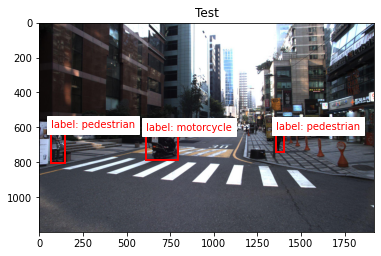

In [ ]:
# Test
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def test(dataset, idx):
    """
    Bounding Box가 그려진 이미지를 만든다
    """
    img, anno = dataset[idx]
    img = np.array(img)
    print(f"이미지 형태: {img.shape}") # height, width, channel
    bboxes = anno['annotations']
    
    plt.title("Test")
    plt.imshow(img)
    ax = plt.gca()
    if type(bboxes) == list:
        for bbox in bboxes:
            rect = patches.Rectangle([bbox['bbox.x'], bbox['bbox.y']], bbox['bbox.width'], bbox['bbox.height'],\
                                    fill=False, ec='red', lw=2.0)
            ax.add_patch(rect)
            plt.annotate(f"label: {bbox['bbox.category']}", [bbox['bbox.x'], bbox['bbox.y']], color='red', \
                        backgroundcolor='white')
    else:
        bbox = bboxes
        rect = patches.Rectangle([bbox['bbox.x'], bbox['bbox.y']], bbox['bbox.width'], bbox['bbox.height'],\
                                fill=False, ec='red', lw=2.0)
        ax.add_patch(rect)
        plt.annotate(f"label: {bbox['bbox.category']}", [bbox['bbox.x'], bbox['bbox.y']], color='red', \
                    backgroundcolor='white')
    return

dataset = AIHUBDataset(root=dataPath, train=True)
test(dataset, 70000)

## 가장 적은 Class에 맞춰 Downsampling 하기
- 가장 적은 Class의 Data 수와 동일하게 맞춘다.
- Data의 기준은 이미지 수!

### Train Set에서 Class 비율 맞추기

In [ ]:
# Class 분포 구하기
from collections import defaultdict
from torch.utils.data import DataLoader
from tqdm import tqdm
import gc

gc.collect() # 추적되지 않는 열려있는 파일들 삭제

dataset = AIHUBDataset(dataPath, train=True)
classes = defaultdict(lambda: 0)

start = 0
end = len(dataset)
step = 512
nxt = 0

for idx in tqdm(range(start, end, step)):
    gc.collect()
    start = idx
    nxt = idx + step if idx + step < end else end
    
    _, annos = dataset[idx:nxt]
    # None을 반환하는 Annos 지우기
    annos = list(filter(lambda x: x != None, annos))
    # Annotations가 없을 수 있다.
    bboxInfos = [anno['annotations'] if anno['annotations'] else {} for anno in annos]

    for bboxInfo in bboxInfos:
        for bbox in bboxInfo:
            classes[bbox['bbox.category']] += 1
            
print("End!")

100%|█████████████████████████████████████████| 431/431 [13:37<00:00,  1.90s/it]

End!


<AxesSubplot:>

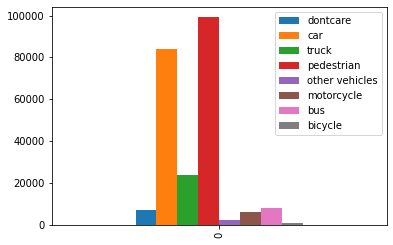

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

classDF = pd.DataFrame(classes, index=[0])
classDF['total'] = sum(classDF.iloc[0, 0:8])
classDF.to_csv('./AIHUB_classInfo.csv', index=False)
classDF = pd.read_csv('./AIHUB_classInfo.csv')

classDF.iloc[:,:8].plot.bar()

In [ ]:
classDF

,dontcare,car,truck,pedestrian,other vehicles,motorcycle,bus,bicycle,total
0,7061,83912,23747,99063,2362,5925,7864,715,230649


- Bicycle이 가장 적다.
- Bycycle의 수에 다른 데이터의 수를 맞추고, dontcare로 바꾼다.
- 사용할 Class는 pedestrian, motorcycle, bicycle이다.

In [ ]:
import gc
from tqdm import tqdm
from collections import defaultdict

dataset = AIHUBDataset(root=dataPath, train=True)
pathesPerClasses = defaultdict(list)

start = 0
end = len(dataset)
step = 512
nxt = 0

for idx in tqdm(range(start, end, step)):
    gc.collect()
    start = idx
    nxt = idx + step if idx + step < end else end
    
    rawPathes, annoPathes, _, annos = dataset.get_with_path(slice(idx,nxt))
    data = list(zip(rawPathes, annoPathes, annos))

    # annotation이 None인 datum 지우기
    data = list(filter(lambda datum: datum[2] != None, data))
    
    # Annotations가 없을 수 있다.
    bboxInfos = [datum[2]['annotations'] if datum[2]['annotations'] else {} for datum in data]

    for i, bboxInfo in enumerate(bboxInfos):
        for bbox in bboxInfo:
            pathesPerClasses[bbox['bbox.category']].append(data[i][0:2]) # rawPath, annoPath 저장하기
print("End!")

100%|█████████████████████████████████████████| 431/431 [16:24<00:00,  2.28s/it]

End!


In [ ]:
import json

for key, val in pathesPerClasses.items():
    pathesPerClasses[key] = set(val)
    print(f"{key}: {len(pathesPerClasses[key])}개")

# 사용할 Class에 해당하는 Path가 다른 Class에 중복된 것을 제거
requiredClasses = ['pedestrian', 'motorcycle', 'bicycle']

## requiredClass간 중복 제거
pathesPerClasses['pedestrian'] = pathesPerClasses['pedestrian'] - pathesPerClasses['motorcycle'] - pathesPerClasses['bicycle']
pathesPerClasses['motorcycle'] = pathesPerClasses['motorcycle'] - pathesPerClasses['bicycle']

for key, val in pathesPerClasses.items():
    if key not in requiredClasses:
        for cls in requiredClasses:
            pathesPerClasses[key] = val - pathesPerClasses[cls]

            
print("="*20)
# 중복을 제외한 개수
for key, val in pathesPerClasses.items():
    print(f"{key}: {len(pathesPerClasses[key])}개")

dontcare: 51920개
pedestrian: 75314개
truck: 95448개
car: 172242개
motorcycle: 38587개
bicycle: 6266개
bus: 41352개
other vehicles: 12559개
dontcare: 51920개
pedestrian: 75314개
truck: 95448개
car: 172242개
motorcycle: 38587개
bicycle: 6266개
bus: 41352개
other vehicles: 12559개


In [ ]:
import re
for key, val in pathesPerClasses.items():
    val = list(val)
    val = list(map(lambda path: str(path), val))
    pathesPerClasses[key] = [re.findall(r"'(.+?)'", v) for v in val]

with open('./pathesPerClass.json', 'wt') as fd:
    json.dump(pathesPerClasses, fd)

In [ ]:
fd = open('./pathesPerClass.json', 'r')
info = json.load(fd)
info['dontcare'][0]

['/Users/teddy/BearTeam/data/datasets/aihub_raw/Training/Raws/Day/Clear/Motorway/20210826_008/Camera/rear/1_1_8_20210826_008_00000062.jpg',
 '/Users/teddy/BearTeam/data/datasets/aihub_raw/Training/Annotations/Day/Clear/Motorway/20210826_008/Camera/rear/1_1_8_20210826_008_00000062.json']

> 각 Class를 ~10,000개로 맞춘다.

In [ ]:
import random
from collections import defaultdict
# Random으로 섞고 자르기
slicedInfo = defaultdict(list)
for key in info:
    random.shuffle(info[key])
    slicedInfo[key] = info[key][:12000] # 일단 12,000개를 선택하고 마지막 저장할 때 10,000개를 선택한다.

In [ ]:
for key, val in slicedInfo.items():
    print(f"{key}: {len(slicedInfo[key])}개")

dontcare: 12000개
pedestrian: 12000개
truck: 12000개
car: 12000개
motorcycle: 12000개
bicycle: 6266개
bus: 12000개
other vehicles: 12000개


> bicycle, motorcycle, pedestrian을 제외한 나머지 Class는 dontcare로 지정한다. 이후, dont care의 수를 10,000개로 맞춘다.

In [ ]:
redefinedInfo = defaultdict(list)
for key, val in slicedInfo.items():
    if key not in ['dontcare', 'bicycle', 'motorcycle', 'pedestrian']:
        redefinedInfo['dontcare'].extend(val)
    elif key in ['bicycle', 'motorcycle', 'pedestrian']:
        redefinedInfo[key] = val

In [ ]:
for key, val in redefinedInfo.items():
    print(f"{key}: {len(redefinedInfo[key])}개")

pedestrian: 12000개
dontcare: 48000개
motorcycle: 12000개
bicycle: 6266개


In [ ]:
# dontcare를 12,000개 선택하기
finalInfo = {key:val if key != 'dontcare' else val[:12000] for key, val in redefinedInfo.items()}
for key, val in finalInfo.items():
    print(f"{key}: {len(finalInfo[key])}개")

pedestrian: 12000개
dontcare: 12000개
motorcycle: 12000개
bicycle: 6266개


In [ ]:
with open('./pathesPerClass_final.json', 'wt') as fd:
    json.dump(finalInfo, fd)

fd = open('./pathesPerClass_final.json', 'r')
info = json.load(fd)

## 선택된 데이터로 데이터셋 재구성

In [ ]:
import re
from tqdm import tqdm
import shutil
from pathlib import Path
basePath = Path(os.getcwd()).parent
newbasePath = Path(basePath) / 'datasets' / 'aihub'
oldbasePath = Path(basePath) / 'datasets' / 'aihub_raw'

fd = open('./pathesPerClass_final.json', 'r')
info = json.load(fd)

for key, val in info.items():
    print(f"Moving {key}...")
    count = 0
    for rawSrc, annoSrc in tqdm(val):
        if count > 10000:
            break # 10,000개만 선택한다.
            
        # Base 바꾸기
        rawDst = Path(re.sub(str(oldbasePath), str(newbasePath), rawSrc))
        annoDst = Path(re.sub(str(oldbasePath), str(newbasePath), annoSrc))
        
        # 이동하기
        if os.path.exists(rawSrc) and os.path.exists(annoSrc):
            os.makedirs(rawDst.parent, exist_ok = True)
            shutil.copy(rawSrc, rawDst)

            os.makedirs(annoDst.parent, exist_ok = True)
            shutil.copy(annoSrc, annoDst)
            count += 1

    print(f"Done: {count}")

Moving pedestrian...


 83%|██████████████████████████████      | 10001/12000 [00:16<00:03, 602.51it/s]


Done: 10001
Moving dontcare...


 83%|██████████████████████████████      | 10001/12000 [00:20<00:04, 486.70it/s]


Done: 10001
Moving motorcycle...


 83%|██████████████████████████████      | 10001/12000 [00:19<00:03, 509.36it/s]


Done: 10001
Moving bicycle...


100%|██████████████████████████████████████| 6266/6266 [00:10<00:00, 596.62it/s]

Done: 6266


이미지 형태: (1200, 1920, 3)


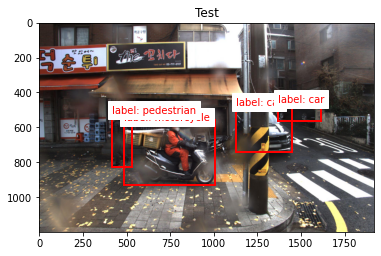

In [ ]:
# Test
dataset = AIHUBDataset(newbasePath, train=True)
test(dataset, 3000)

### Validation 정리하기

In [ ]:
# Class 분포 구하기
from collections import defaultdict
from torch.utils.data import DataLoader
from tqdm import tqdm
import gc

gc.collect() # 추적되지 않는 열려있는 파일들 삭제

dataset = AIHUBDataset(dataPath, train=False)
classes = defaultdict(lambda: 0)

start = 0
end = len(dataset)
step = 512
nxt = 0

for idx in tqdm(range(start, end, step)):
    gc.collect()
    start = idx
    nxt = idx + step if idx + step < end else end
    
    _, annos = dataset[idx:nxt]
    # None을 반환하는 Annos 지우기
    annos = list(filter(lambda x: x != None, annos))
    # Annotations가 없을 수 있다.
    bboxInfos = [anno['annotations'] if anno['annotations'] else {} for anno in annos]

    for bboxInfo in bboxInfos:
        for bbox in bboxInfo:
            classes[bbox['bbox.category']] += 1
            
print("End!")

100%|███████████████████████████████████████████| 54/54 [01:35<00:00,  1.77s/it]

End!


<AxesSubplot:>

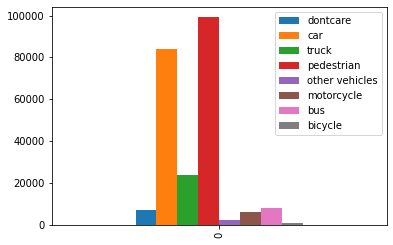

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

classDF = pd.DataFrame(classes, index=[0])
classDF['total'] = sum(classDF.iloc[0, 0:8])
classDF.to_csv('./AIHUB_classInfo.csv', index=False)
classDF = pd.read_csv('./AIHUB_classInfo.csv')

classDF.iloc[:,:8].plot.bar()

In [ ]:
classDF

,dontcare,car,truck,pedestrian,other vehicles,motorcycle,bus,bicycle,total
0,7061,83912,23747,99063,2362,5925,7864,715,230649


> bicycle의 수에 맞춰서 ~1000개씩 선택한다.

In [ ]:
import gc
from tqdm import tqdm
from collections import defaultdict

dataset = AIHUBDataset(root=dataPath, train=False)
pathesPerClasses = defaultdict(list)

start = 0
end = len(dataset)
step = 512
nxt = 0

for idx in tqdm(range(start, end, step)):
    gc.collect()
    start = idx
    nxt = idx + step if idx + step < end else end
    
    rawPathes, annoPathes, _, annos = dataset.get_with_path(slice(idx,nxt))
    data = list(zip(rawPathes, annoPathes, annos))

    # annotation이 None인 datum 지우기
    data = list(filter(lambda datum: datum[2] != None, data))
    
    # Annotations가 없을 수 있다.
    bboxInfos = [datum[2]['annotations'] if datum[2]['annotations'] else {} for datum in data]

    for i, bboxInfo in enumerate(bboxInfos):
        for bbox in bboxInfo:
            pathesPerClasses[bbox['bbox.category']].append(data[i][0:2]) # rawPath, annoPath 저장하기
print("End!")

100%|███████████████████████████████████████████| 54/54 [01:28<00:00,  1.63s/it]

End!


In [ ]:
import json

for key, val in pathesPerClasses.items():
    pathesPerClasses[key] = set(val)
    print(f"{key}: {len(pathesPerClasses[key])}개")

# 사용할 Class에 해당하는 Path가 다른 Class에 중복된 것을 제거
requiredClasses = ['pedestrian', 'motorcycle', 'bicycle']

## requiredClass간 중복 제거
pathesPerClasses['pedestrian'] = pathesPerClasses['pedestrian'] - pathesPerClasses['motorcycle'] - pathesPerClasses['bicycle']
pathesPerClasses['motorcycle'] = pathesPerClasses['motorcycle'] - pathesPerClasses['bicycle']

for key, val in pathesPerClasses.items():
    if key not in requiredClasses:
        for cls in requiredClasses:
            pathesPerClasses[key] = val - pathesPerClasses[cls]

            
print("="*20)
# 중복을 제외한 개수
for key, val in pathesPerClasses.items():
    print(f"{key}: {len(pathesPerClasses[key])}개")

dontcare: 5794개
car: 21848개
truck: 12093개
pedestrian: 14263개
other vehicles: 2237개
motorcycle: 4386개
bus: 4693개
bicycle: 675개
dontcare: 5706개
car: 21273개
truck: 11789개
pedestrian: 10565개
other vehicles: 2172개
motorcycle: 4195개
bus: 4531개
bicycle: 675개


In [ ]:
import re
for key, val in pathesPerClasses.items():
    val = list(val)
    val = list(map(lambda path: str(path), val))
    pathesPerClasses[key] = [re.findall(r"'(.+?)'", v) for v in val]

with open('./pathesPerClass.json', 'wt') as fd:
    json.dump(pathesPerClasses, fd)

In [ ]:
fd = open('./pathesPerClass.json', 'r')
info = json.load(fd)
info['dontcare'][0]

['/Users/teddy/BearTeam/data/datasets/aihub_raw/Validation/Raws/Day/Clear/NewTown/20210906_052/Camera/left/1_1_2_20210906_052_00000078.jpg',
 '/Users/teddy/BearTeam/data/datasets/aihub_raw/Validation/Annotations/Day/Clear/NewTown/20210906_052/Camera/left/1_1_2_20210906_052_00000078.json']

In [ ]:
import random
from collections import defaultdict
# Random으로 섞고 자르기
slicedInfo = defaultdict(list)
for key in info:
    random.shuffle(info[key])
    slicedInfo[key] = info[key][:1200] # 일단 1,200개를 선택하고 마지막 저장할 때 1,200개를 선택한다.

In [ ]:
for key, val in slicedInfo.items():
    print(f"{key}: {len(slicedInfo[key])}개")

dontcare: 1200개
car: 1200개
truck: 1200개
pedestrian: 1200개
other vehicles: 1200개
motorcycle: 1200개
bus: 1200개
bicycle: 675개


In [ ]:
# 필요한 클레스가 아닌 나머지는 dontcare로 지정하기

redefinedInfo = defaultdict(list)
for key, val in slicedInfo.items():
    if key not in ['dontcare', 'bicycle', 'motorcycle', 'pedestrian']:
        redefinedInfo['dontcare'].extend(val)
    elif key in ['bicycle', 'motorcycle', 'pedestrian']:
        redefinedInfo[key] = val

In [ ]:
for key, val in redefinedInfo.items():
    print(f"{key}: {len(redefinedInfo[key])}개")

dontcare: 4800개
pedestrian: 1200개
motorcycle: 1200개
bicycle: 675개


In [ ]:
# dontcare를 1,200개 선택하기
finalInfo = {key:val if key != 'dontcare' else val[:1200] for key, val in redefinedInfo.items()}
for key, val in finalInfo.items():
    print(f"{key}: {len(finalInfo[key])}개")

dontcare: 1200개
pedestrian: 1200개
motorcycle: 1200개
bicycle: 675개


In [ ]:
with open('./pathesPerClass_final.json', 'wt') as fd:
    json.dump(finalInfo, fd)

fd = open('./pathesPerClass_final.json', 'r')
info = json.load(fd)

In [ ]:
# 새롭게 만들기!
import re
from tqdm import tqdm
import shutil
from pathlib import Path
basePath = Path(os.getcwd()).parent
newbasePath = Path(basePath) / 'datasets' / 'aihub'
oldbasePath = Path(basePath) / 'datasets' / 'aihub_raw'

fd = open('./pathesPerClass_final.json', 'r')
info = json.load(fd)

for key, val in info.items():
    print(f"Moving {key}...")
    count = 0
    for rawSrc, annoSrc in tqdm(val):
        if count > 1000:
            break # 1,000개만 선택한다.
            
        # Base 바꾸기
        rawDst = Path(re.sub(str(oldbasePath), str(newbasePath), rawSrc))
        annoDst = Path(re.sub(str(oldbasePath), str(newbasePath), annoSrc))
        
        # 이동하기
        if os.path.exists(rawSrc) and os.path.exists(annoSrc):
            os.makedirs(rawDst.parent, exist_ok = True)
            shutil.copy(rawSrc, rawDst)

            os.makedirs(annoDst.parent, exist_ok = True)
            shutil.copy(annoSrc, annoDst)
            count += 1

    print(f"Done: {count}")

Moving dontcare...


 83%|███████████████████████████████▋      | 1001/1200 [00:01<00:00, 713.73it/s]


Done: 1001
Moving pedestrian...


 83%|███████████████████████████████▋      | 1001/1200 [00:01<00:00, 834.91it/s]


Done: 1001
Moving motorcycle...


 83%|███████████████████████████████▋      | 1001/1200 [00:01<00:00, 870.78it/s]


Done: 1001
Moving bicycle...


100%|████████████████████████████████████████| 675/675 [00:00<00:00, 849.52it/s]

Done: 675


이미지 형태: (1200, 1920, 3)


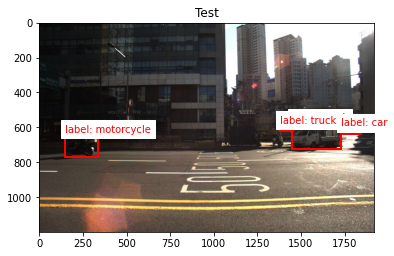

In [ ]:
# Test
dataset = AIHUBDataset(newbasePath, train=False)
test(dataset, 100)